In [1]:
# Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR_sklearn
from sklearn.model_selection import train_test_split

In [477]:
# Libraries needed- Numpy, StandardScaler from sklearn.preprocessing

class LinearRegressionMV():
    
    def __init__(self):
        self.theta=0
        self.scale=None
    
    def cost(self,h,y):
        m=len(y)
        J=np.sum((h - y) ** 2)/(2 * m) # MEan Square Error
        return J
    
    def fit(self,X,y,epoch=1000,lr=0.01,cost_plot=False, scale=True):
        if scale==True:
            self.scale=True
            self.sc=StandardScaler()
            X = self.sc.fit_transform(X)
        
        X=np.c_[np.ones(len(y)),X]
        self.theta=np.zeros(X.shape[1]) # Initialising Weights
        print(X.shape,y.shape,self.theta.shape)
        m=len(y) # No. of Training Examples
        
        costs = []
        
        for iteration in range(epoch):
            h=X.dot(self.theta)
            # Updation Theta values with gradient descent equation
            self.theta=self.theta-(lr*X.T.dot(h-y))/m
            if np.isnan(sum(self.theta)) or np.isinf(sum(self.theta)):
                print("For loop broke")
                break
            costs.append(self.cost(h,y))
            #print('Iteration- {}   Cost- {} Theta  -{}'.format(iteration+1,costs[iteration],self.theta))
        
        if cost_plot==True:
            plt.plot(range(1,len(costs)+1),costs)
            plt.xlabel("No. of Iterations")
            plt.ylabel("Costs")
            plt.show()
        
        
        print("Weights:= ",self.theta)
        return self.theta, costs
    def predict(self,X):
        X=np.array(X).reshape(-1,len(self.theta)-1)
        if self.scale==True:
            sc1=StandardScaler()
            X=sc1.fit_transform(X)
        X=np.c_[np.ones(X.shape[0]),X]
        
        return X.dot(self.theta)
        

In [420]:
salary=pd.read_csv('../Downloads/datasets_9401_13260_Salary_Data.csv')

In [421]:
salary.shape

(30, 2)

In [422]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [423]:
X=salary['YearsExperience'].values
y=salary['Salary'].values

In [424]:
X.shape

(30,)

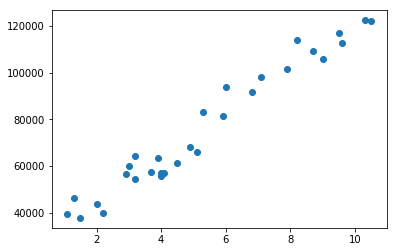

In [425]:
plt.scatter(X,y)

(30, 2) (30,) (2,)


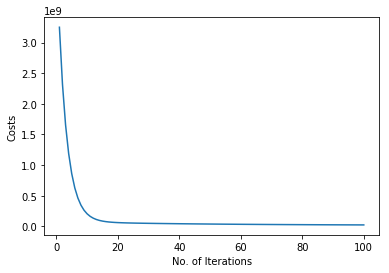

Weights:=  [17551.09112696 10672.90803893]


In [426]:
lr=LinearRegressionMV()
a,b=lr.fit(X.reshape(-1,1),y,cost_plot=True,epoch=100,lr=.05,scale=False)

In [430]:
lr.predict([1.5])

array([33560.45318536])

In [431]:
lr.predict([1.5,2,4])

array([33560.45318536, 38896.90720482, 60242.72328268])

In [465]:
data=pd.read_excel('../Downloads/CCPP/CCPP/Folds5x2_pp.xlsx')

In [466]:
type(data)

pandas.core.frame.DataFrame

In [467]:
#seperating data
X = data[data.columns[:-1]]
y = data['PE']

In [435]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X = sc.fit_transform(X)

In [436]:
y.shape

(9568,)

(9568, 5) (9568,) (5,)


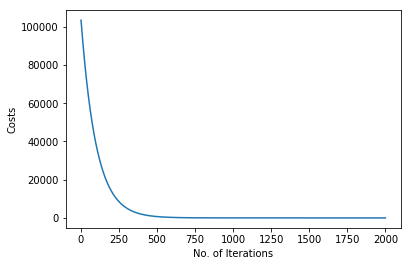

Weights:=  [454.34489226 -11.92922765  -5.0362547    0.90928662  -1.38328348]


In [478]:
lr=LinearRegressionMV()
a,b=lr.fit(X,y,cost_plot=True,epoch=2000,lr=.005)

In [479]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [480]:
lr.predict([14.9,41.76,1024.07,73.17])

array([454.34489226])

In [485]:
test=np.array([[14.9,41.76,1024.07,73.17],[14.9,31.76,1000.07,73.17]])

In [486]:
lr.predict(test)

array([450.21792418, 458.47186034])

In [490]:
data1=pd.read_csv('../Downloads/data.txt',names=['X','y'])

In [491]:
data1.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [492]:
data1.shape

(97, 2)

In [493]:
X=data1.X.values.reshape(-1,1)
y=data1.y.values

In [495]:
lr1=LinearRegressionMV()
w,c=lr.fit(X,y,lr=0.01,epoch=1000)

(97, 2) (97,) (2,)
Weights:=  [5.83888297 4.59284285]


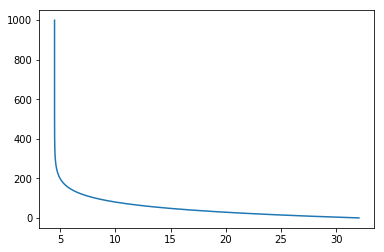

In [496]:
plt.plot(c,range(len(c)))